In [8]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator, MultipleLocator

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]


In [9]:
proj_path = "/home/4cv/project/gc_openPMD-viewer/"

In [10]:
# Function to read memory usage data from .mem file
def read_memlog(file_path):
    timestamps = []
    used_memory = []
    
    with open(file_path, 'r') as file:
        for line in file:
            if 'Current Date and time' in line:
                timestamp_str = line.split(': ')[1].strip()
                timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                timestamps.append(timestamp)
            elif 'Mem:' in line:
                parts = line.split()
                memory_used = float(parts[2].replace('Gi', ''))
                used_memory.append(memory_used)
    
    return timestamps, used_memory

In [11]:
global_tick_fontsize = 20
global_label_fontsize = 24
global_annotation_fontsize = 20
global_legend_fontsize = 18

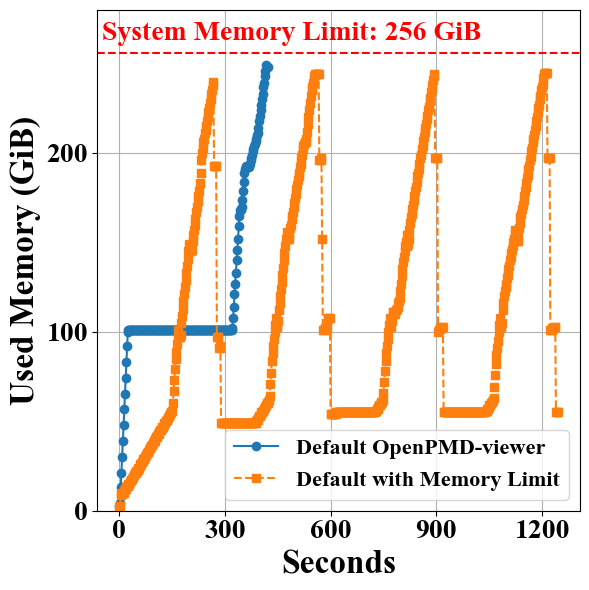

In [56]:

# Define file paths
file_path_default = proj_path + 'results/final/type_1_00001_default.mem'
file_path_limit_max = proj_path + 'results/final/type_1_00001_limit_max.mem'

# Read data from both files
timestamps_default, used_memory_default = read_memlog(file_path_default)
timestamps_limit_max, used_memory_limit_max = read_memlog(file_path_limit_max)

# Calculate time index in seconds (assuming each point is recorded every 2 seconds)
time_index_default = [(t - timestamps_default[0]).total_seconds() for t in timestamps_default]
time_index_limit_max = [(t - timestamps_limit_max[0]).total_seconds() for t in timestamps_limit_max]

# Plotting
plt.figure(figsize=(6, 6))

# Plot data from type_1_00001_default.mem
plt.plot(time_index_default[:-1], used_memory_default[:-1], marker='o', linestyle='-', label='type_1_00001_default')

# Plot data from type_1_00001_limit_max.mem
plt.plot(time_index_limit_max[:-1], used_memory_limit_max[:-1], marker='s', linestyle='--', label='type_1_00001_limit_max')

# Add a dashed line at 256 GiB (system memory limit)
plt.axhline(y=256, color='r', linestyle='--')

# Add text label next to the line
plt.text(490, 260, 'System Memory Limit: 256 GiB', color='r', va='bottom', ha='center', backgroundcolor='none', fontsize=global_annotation_fontsize, fontweight='bold')


plt.ylim(0, 280)
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
plt.gca().xaxis.set_major_locator(MultipleLocator(300))


plt.xlabel('Seconds', fontweight='bold', fontsize=global_label_fontsize)
plt.ylabel('Used Memory (GiB)', fontweight='bold', fontsize=global_label_fontsize)

plt.gca().tick_params(axis='y', labelsize=global_tick_fontsize)  # Adjust label size as needed
plt.gca().tick_params(axis='x', labelsize=global_tick_fontsize)  # Adjust label size as needed
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')


plt.grid(True)
legend = plt.legend(fontsize=global_legend_fontsize - 2, loc='lower right', labels=['Default OpenPMD-viewer', 'Default with Memory Limit'])
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout()
plt.savefig(proj_path + 'plot/final/default_memory_usage.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

plt.show()